- CaseCadeClassifier  
    - opencv에서 제공하는 이미지 검출용 알고리즘.
    - 어떤 것을 검출할지에 대한 데이터가 담긴 casecade 파일을 지정하여 원하는 대상을 검출할 수 있는 알고림즘.
    - 검출 대상이 달라진다고 해서 코드가 달라지는 부분은 거의 없고, 검출 대상에 맞는 casecade 파일을 지정하면 됨.

In [1]:
import cv2, sys
import matplotlib.pyplot as plt

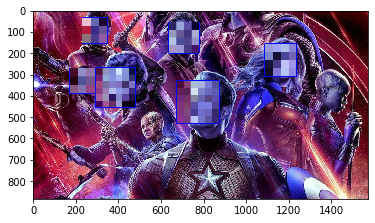

In [22]:
# 이미지 파일.
img_file = 'photo/avengers.jpg'

# casecade 파일 지정.
# 검출하고자 하는 대상에 대한 casecade 파일을 복사해준다.
# C:\opencv\build\etc
casecade_file = 'haarcascade_frontalface_alt.xml'

# casecade Classifier 생성.
model = cv2.CascadeClassifier(casecade_file)

# 이미지 불러오기.
img = cv2.imread(img_file)

# 검출 효과를 높이기 위해 한가지 색상형태로 변환.(Grayscale)
img_gs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(img_gs)
# plt.show()

# 얼굴 인식 시작.
# minSize=(150,150) : 얼굴을 찾기 위한 최소 영역의 크기.
# minNeighbors=1 : 최소 이웃 색상의 수. 낮을 수록 정밀하게 탐색.
face_List = model.detectMultiScale(img_gs, minSize=(100,100), minNeighbors=1)
# face_List

# 찾은 얼굴이 있다면,
if len(face_List) > 0 :
    # 영역 색상
    col = (0, 0, 255)
    # 얼굴 수만큼 반복.
    for face in face_List :
        # 영역값 추출.
        x, y, w, h = face
        # 네모를 그려줌.
        cv2.rectangle(img, (x,y), (x+w, y+w), col, thickness=8)
        
        # 모자이크 처리.
        # 얼굴 영역의 이미지를 가져옴.
        face_img = img[y:y+h, x:x+w]
        # 자른 이미지 축소.
        face_img = cv2.resize(face_img, (w // 30, h // 30))
        # 원래 크기로 확대.
        face_img = cv2.resize(face_img, (w,h), interpolation=cv2.INTER_AREA)
        # 원래 얼굴 위치에 덮어줌.
        img[y:y+h, x:x+h] = face_img

plt.imshow(img)
plt.show()

# 이미지 파일로 저장.
# cv2.imwrite('cv2_result.png', img)